<a href="https://colab.research.google.com/github/axe-n/tvm/blob/main/IMS22037_NLD_DEMONSTRATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EULERS METHOD
t = 4
h = 0.0001
y0 = 1 #c
timesteps = int(t / h)

for i in range(timesteps):
    dydt = y0
    y0 = y0 + h * dydt
# FIND AREA Y=F(X) IN SMALL TIMESTEPS
print(y0)

54.587232222803365


In [ ]:
#RANGE_KUTTA METHOD (RK4?)
t = 4
h = 0.01
y0 = 1
timesteps = int(t / h)

for i in range(timesteps):
    k1 =(y0)
    k2 =(y0 + 0.5 *h* k1)
    k3 =(y0 + 0.5 *h* k2)
    k4 =(y0 + h*k3)

    y0 = y0 + h*(k1 + 2*k2 + 2*k3 + k4) / 6  # RK4 update step

print(y0)


54.59815001509595


Enter the value of a: 2
Enter simulation end time: 22
Enter initial x: 2
Enter initial y: 2


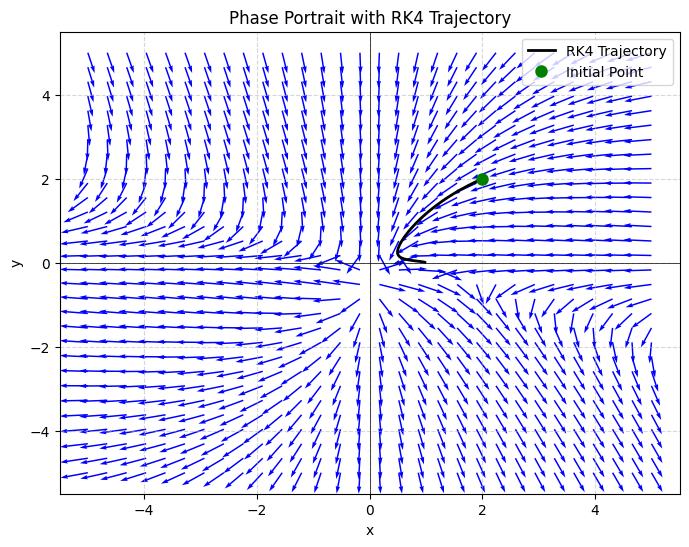

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = X*(1-X-a*Y)
    dydt = -Y*(1-X+a*Y)
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U = X*(1-X-a*Y)
V = -Y*(1-X+a*Y)

# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


Enter the value of a: 2
Enter simulation end time: 4
Enter initial x: 2
Enter initial y: 2


ValueError: '2black' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

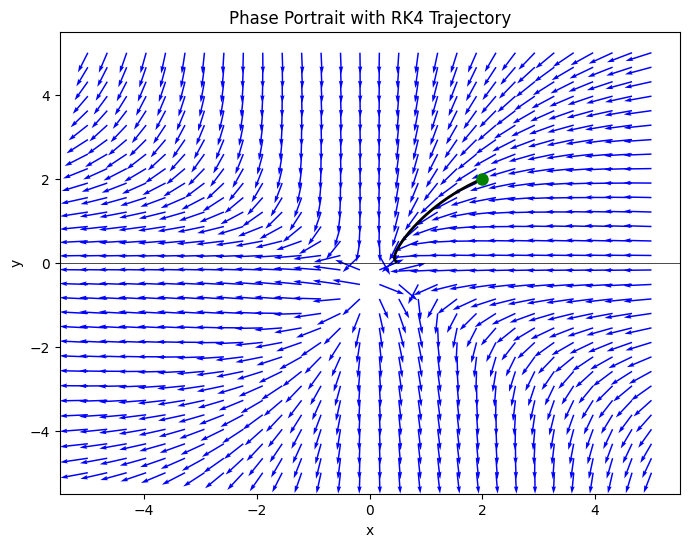

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = X*(1-Y-a*X)
    dydt = -Y*(1-X+a*Y)
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U = X*(1-Y-a*X)
V = -Y*(1-X+a*Y)

# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="2black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


Enter the value of a: 2
Enter simulation end time: 5
Enter initial x: 5
Enter initial y: 5


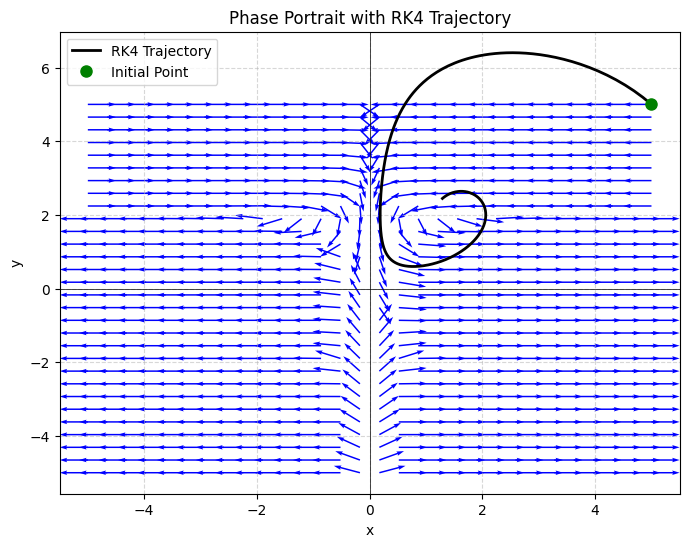

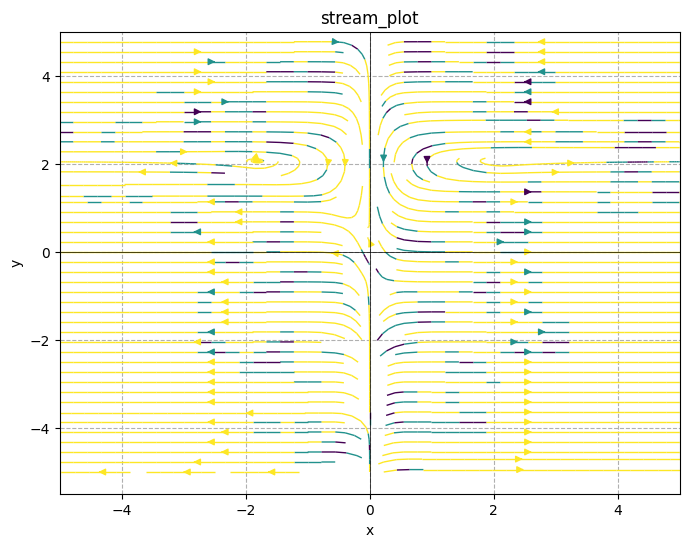

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = ((a*X-X*Y))
    dydt = ((X**(2)-Y))
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U = (a*X-X*Y)
((X**(2)-Y))
    # dxdt = (a*X-X*Y)
    # dydt = (X^2)-Y

# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("stream_plot")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=1)
plt.show()


Enter the value of a: -2
Enter simulation end time: 11
Enter initial x: 2
Enter initial y: 2


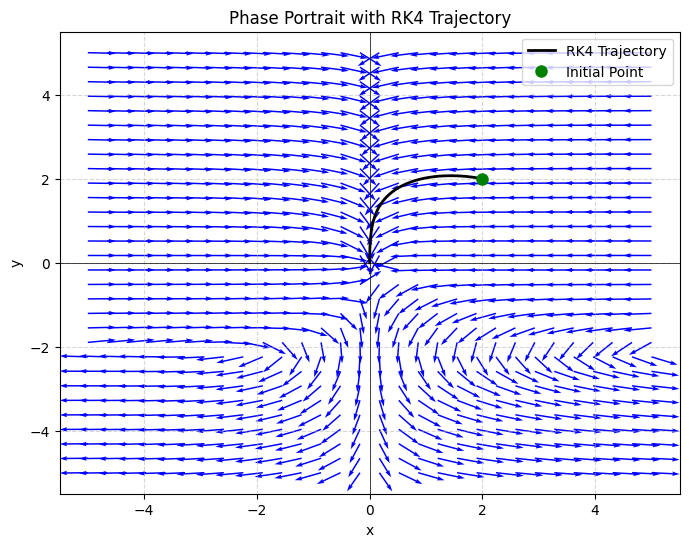

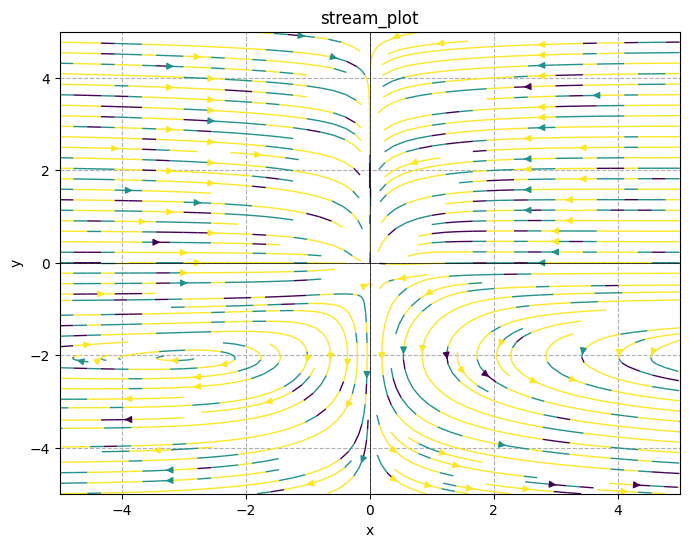

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = ((a*X-X*Y))
    dydt = ((X**(2)-Y))
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U = (a*X-X*Y)
((X**(2)-Y))
    # dxdt = (a*X-X*Y)
    # dydt = (X^2)-Y

# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("stream_plot")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=1)
plt.show()


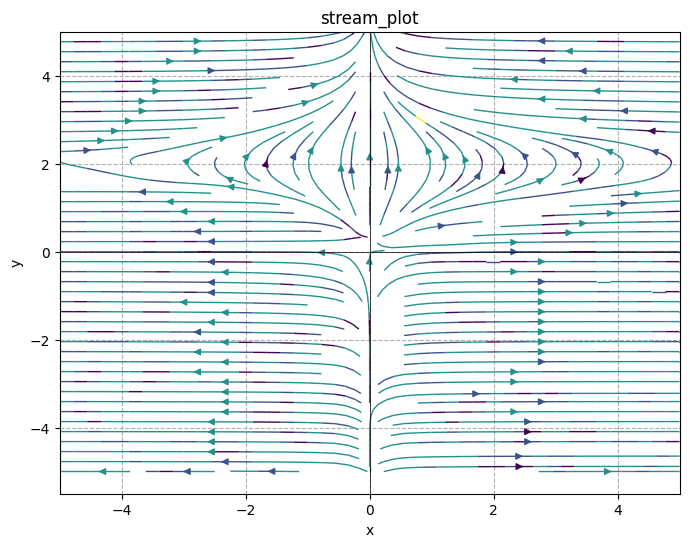

In [ ]:
# """ Plot the streamplot of the vector field. """
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("stream_plot")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=1)
plt.show()
# """
# print("welcome")

Enter the value of a: 2
Enter simulation end time: 4
Enter initial x: 2
Enter initial y: 2


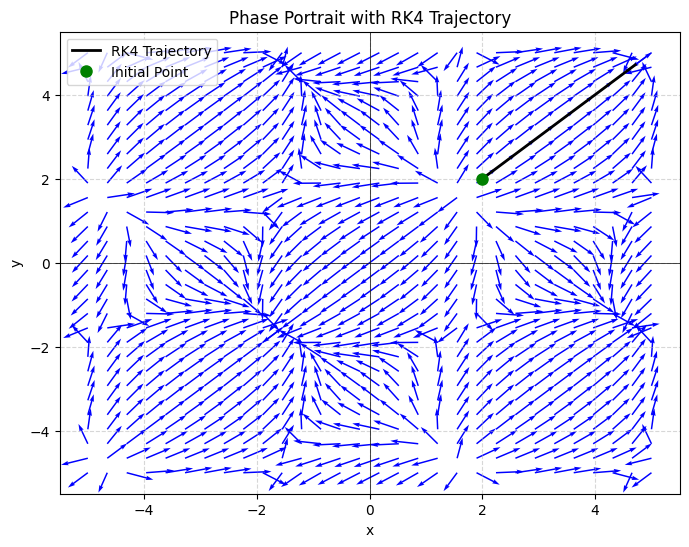

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = -2*np.cos(X)-np.cos(Y)
    dydt = -2*np.cos(Y)-np.cos(X)
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U =  -2*np.cos(X)-np.cos(Y)
V =  -2*np.cos(Y)-np.cos(X)

    # dxdt = Y
    #     dydt = -Y+a*X-X**(2)


# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("stream_plot")
# plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(0, color="black", linewidth=0.5)
# plt.grid(True, linestyle="--", alpha=1)
# plt.show()


Enter the value of a: 2
Enter simulation end time: 11
Enter initial x: 2
Enter initial y: 2


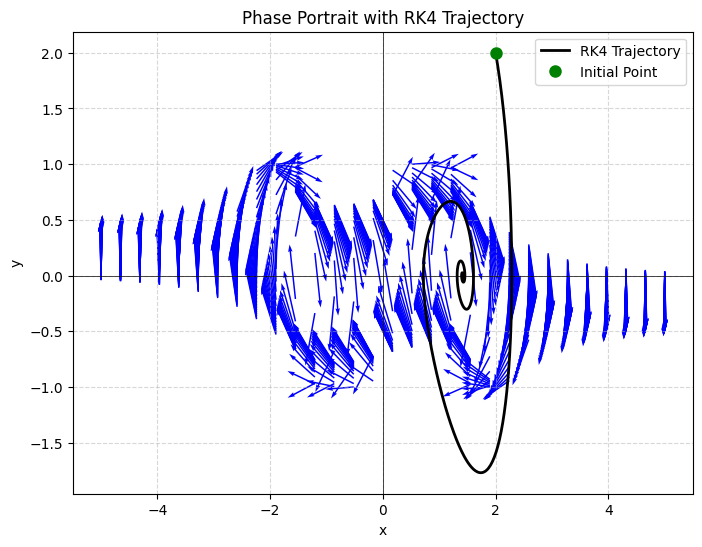

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = Y
    dydt = -Y+a*X-X**(3)
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U =  Y
V = -Y+a*X-X**(3)

    # dxdt = Y
    #     dydt = -Y+a*X-X**(2)


# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("stream_plot")
# plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(0, color="black", linewidth=0.5)
# plt.grid(True, linestyle="--", alpha=1)
# plt.show()


Enter the value of a: -2
Enter simulation end time: 11
Enter initial x: 2
Enter initial y: 2


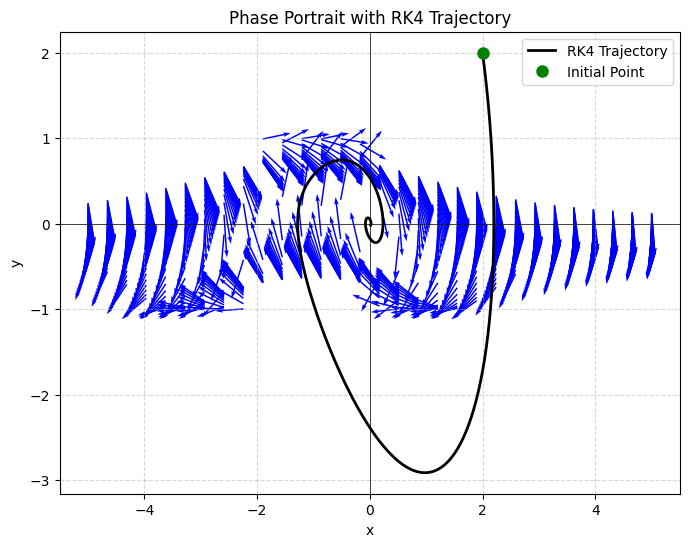

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = Y
    dydt = -Y+a*X-X**(2)
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U =  Y
V = -Y+a*X-X**(2)

    # dxdt = Y
    #     dydt = -Y+a*X-X**(2)


# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("stream_plot")
# plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(0, color="black", linewidth=0.5)
# plt.grid(True, linestyle="--", alpha=1)
# plt.show()


Enter the value of a: 2
Enter simulation end time: 4
Enter initial x: 2
Enter initial y: 2


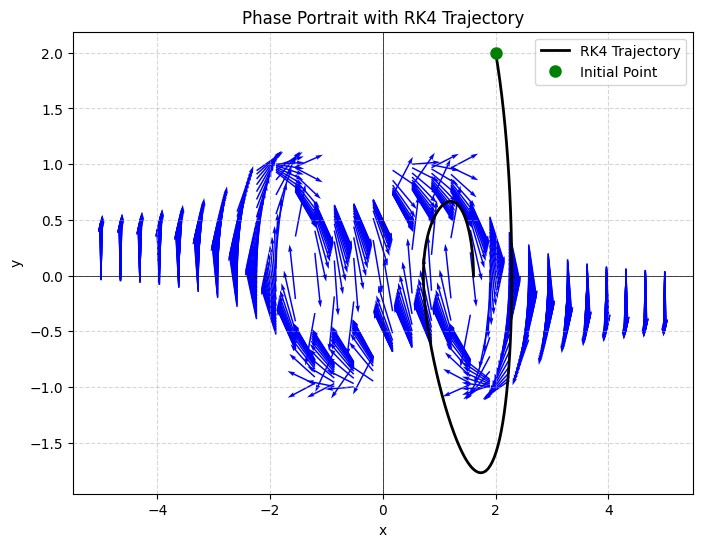

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = Y
    dydt = a*(1-x**(2)*Y-X)
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U =  Y
V = a*(1-x**(2)*Y-X)

    # dxdt = Y
    #     dydt = -Y+a*X-X**(2)


# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("stream_plot")
# plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(0, color="black", linewidth=0.5)
# plt.grid(True, linestyle="--", alpha=1)
# plt.show()


Enter the value of a: 2
Enter simulation end time: 22
Enter initial x: 2
Enter initial y: 2


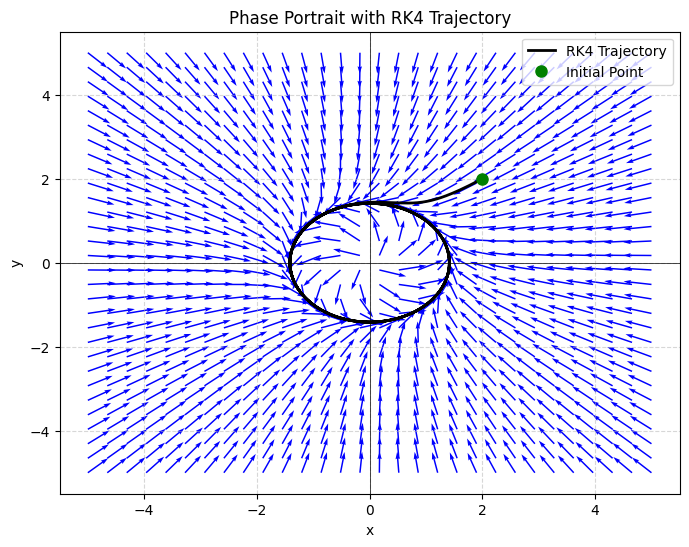

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = a*X-Y-X*(X**(2)+Y**(2))
    dydt = X+a*Y-Y*(X**(2)+Y**(2))
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U =  a*X-Y-X*(X**(2)+Y**(2))
V = X+a*Y-Y*(X**(2)+Y**(2))

    # dxdt = Y
    #     dydt = -Y+a*X-X**(2)


# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("stream_plot")
# plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(0, color="black", linewidth=0.5)
# plt.grid(True, linestyle="--", alpha=1)
# plt.show()


Enter the value of a: 2
Enter simulation end time: 22
Enter initial x: 0.1
Enter initial y: 0.1


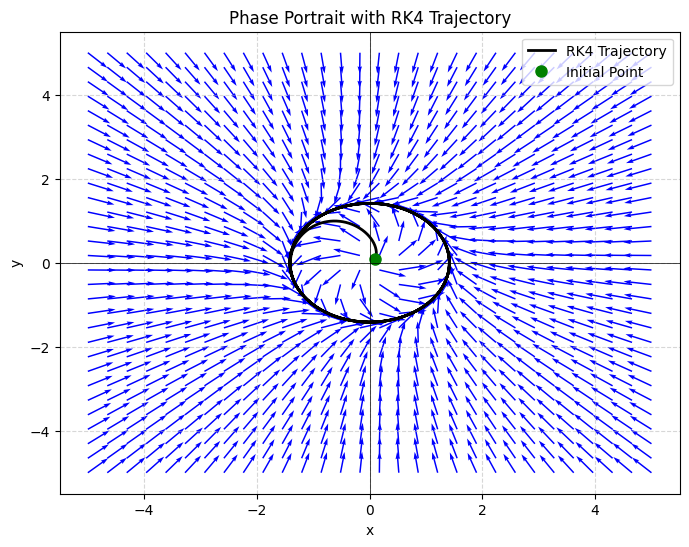

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = a*X-Y-X*(X**(2)+Y**(2))
    dydt = X+a*Y-Y*(X**(2)+Y**(2))
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U =  a*X-Y-X*(X**(2)+Y**(2))
V = X+a*Y-Y*(X**(2)+Y**(2))

    # dxdt = Y
    #     dydt = -Y+a*X-X**(2)


# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("stream_plot")
# plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(0, color="black", linewidth=0.5)
# plt.grid(True, linestyle="--", alpha=1)
# plt.show()


Enter the value of a: 2
Enter simulation end time: 5
Enter initial x: 2
Enter initial y: 2


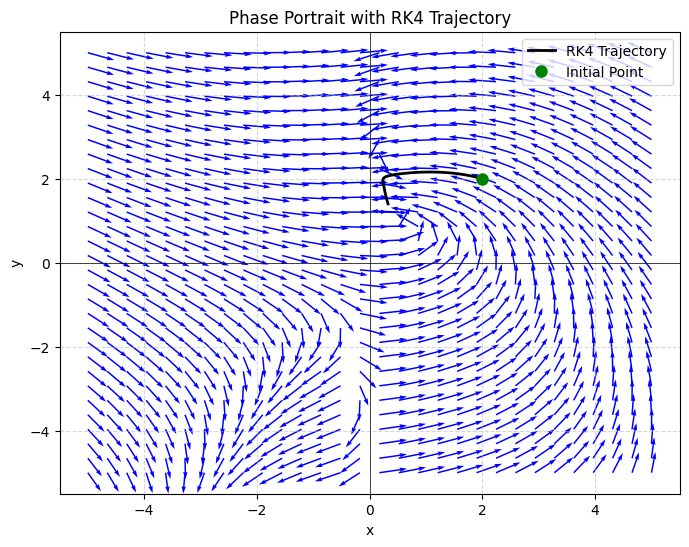

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = a-X-((4*X*Y)/(1+X**(2)))
    dydt = X*(1-(Y/(1+X**(2))))
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U = a-X-((4*X*Y)/(1+X**(2)))
V = X*(1-(Y/(1+X**(2))))

    # dxdt = Y
    #     dydt = -Y+a*X-X**(2)


# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("stream_plot")
# plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(0, color="black", linewidth=0.5)
# plt.grid(True, linestyle="--", alpha=1)
# plt.show()


Enter the value of a: 2
Enter simulation end time: 5
Enter initial x: 3
Enter initial y: 3


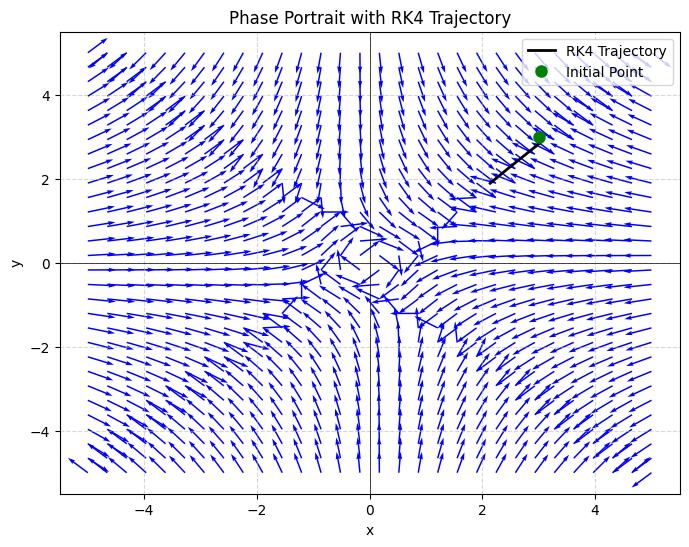

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = Y-X**3+X*Y**2
    dydt = -X-Y**3+X**2*Y
    return np.array([dxdt, dydt])


# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U = Y-X**3+X*Y**2
V = -X-Y**3+X**2*Y
# U = a-X-((4*X*Y)/(1+X**(2)))
# V = X*(1-(Y/(1+X**(2))))

    # dxdt = Y
    #     dydt = -Y+a*X-X**(2)


# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("stream_plot")
# plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(0, color="black", linewidth=0.5)
# plt.grid(True, linestyle="--", alpha=1)
# plt.show()


Enter the value of a: 2
Enter simulation end time: 33
Enter initial x: 1
Enter initial y: 0


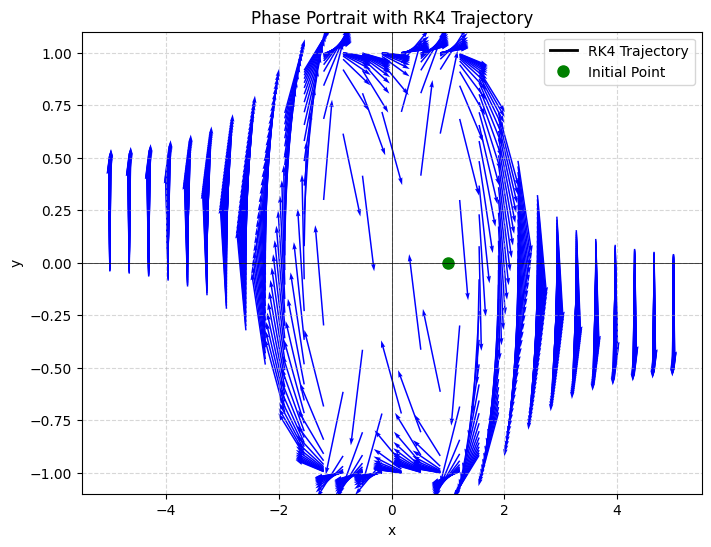

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = Y
    dydt = X-X**3
    return np.array([dxdt, dydt])


# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U = Y
V = X-X**3
# U = a-X-((4*X*Y)/(1+X**(2)))
# V = X*(1-(Y/(1+X**(2))))

    # dxdt = Y
    #     dydt = -Y+a*X-X**(2)


# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("stream_plot")
# plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(0, color="black", linewidth=0.5)
# plt.grid(True, linestyle="--", alpha=1)
# plt.show()


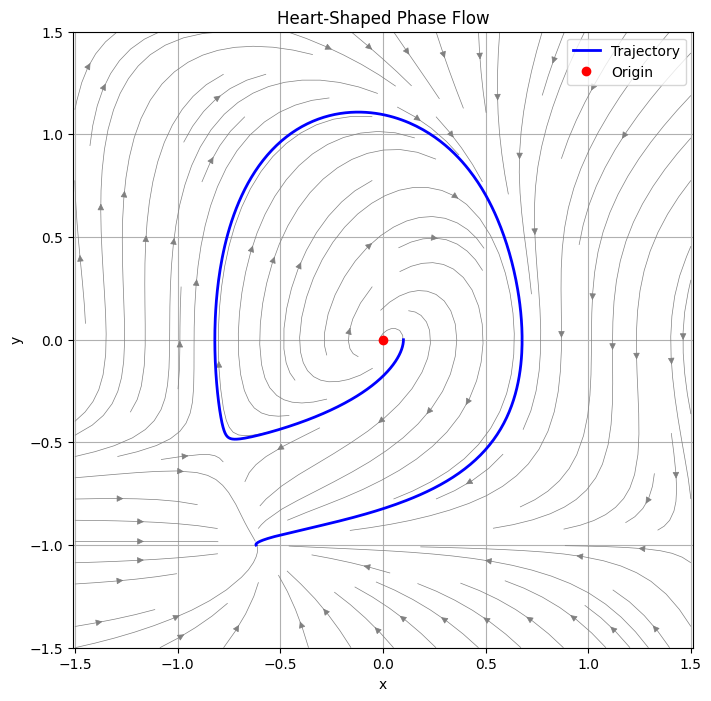

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def love_system(state, t):
    x, y = state
    xdot = y * (1 - x**2) - x * y**2
    ydot = -x * (1 + y) + y * (1 - y**2)
    return [xdot, ydot]

# Time array for simulation
t = np.linspace(0, 20, 1000)

# Initial condition near the origin
initial = [0.1, 0]

# Solve the system
sol = odeint(love_system, initial, t)

# Extract x and y solutions
x = sol[:, 0]
y = sol[:, 1]

# Create a grid for the vector field
x_grid, y_grid = np.meshgrid(np.linspace(-1.5, 1.5, 20), np.linspace(-1.5, 1.5, 20))
xdot = y_grid * (1 - x_grid**2) - x_grid * y_grid**2
ydot = -x_grid * (1 + y_grid) + y_grid * (1 - y_grid**2)

# Plot the phase portrait
plt.figure(figsize=(8, 8))
plt.streamplot(x_grid, y_grid, xdot, ydot, color='gray', linewidth=0.5, density=1)  # Vector field
plt.plot(x, y, 'b-', linewidth=2, label='Trajectory')  # Heart-shaped trajectory
plt.plot(0, 0, 'ro', label='Origin')  # Fixed point
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heart-Shaped Phase Flow')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for true shape
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = Y
    dydt = X-X**3
    return np.array([dxdt, dydt])


# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U = Y
V = X-X**3
# U = a-X-((4*X*Y)/(1+X**(2)))
# V = X*(1-(Y/(1+X**(2))))

    # dxdt = Y
    #     dydt = -Y+a*X-X**(2)


# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("stream_plot")
# plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(0, color="black", linewidth=0.5)
# plt.grid(True, linestyle="--", alpha=1)
# plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = Y-X**2
    dydt = (X**2)+(Y**2)-4
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U = Y-X**2
V = (X**2)+(Y**2)-4
# U = a-X-((4*X*Y)/(1+X**(2)))
# V = -Y*(1-X+a*Y)

# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


Enter the value of a: 2
Enter simulation end time: 2
Enter initial x: 2
Enter initial y: 2


ValueError: operands could not be broadcast together with shapes (2,) (2,3) 

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets
from ipywidgets import interactive, HBox
from IPython.display import display

# Define the ODE system
def odes(t, state, mu, epsilon, alpha, beta):
    """
    Computes the derivatives for the system:
      dx/dt = mu * (x + y - (1/3)*x^3 + epsilon)
      dy/dt = -(1/mu) * (x - alpha + beta*y)
    """
    x, y = state
    dx_dt = mu * (x + y - (1/3) * x**3 + epsilon)
    dy_dt = - (1/mu) * (x - alpha + beta * y)
    return [dx_dt, dy_dt]

# Define the simulation function, which will be called by the interactive widget.
def simulate(mu=1.0, epsilon=0.0, alpha=1.0, beta=0.5):
    # Time interval and initial conditions
    t_span = [0, 50]
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    initial_state = [0.1, 0.1]  # You can adjust the initial conditions as needed.

    # Solve the ODE system
    sol = solve_ivp(odes, t_span, initial_state, args=(mu, epsilon, alpha, beta), t_eval=t_eval)

    # Create plots for the time series and the phase portrait.
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the time series of x(t) and y(t)
    axs[0].plot(sol.t, sol.y[0], 'b-', label='x(t)')
    axs[0].plot(sol.t, sol.y[1], 'r--', label='y(t)')
    axs[0].set_title('Time Series')
    axs[0].set_xlabel('Time (t)')
    axs[0].set_ylabel('States')
    axs[0].legend()

    # Plot the phase portrait: y versus x
    axs[1].plot(sol.y[0], sol.y[1], 'k-')
    axs[1].set_title('Phase Portrait')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')

    plt.tight_layout()
    plt.show()

# Create interactive sliders for each parameter.
interactive_plot = interactive(simulate,
                               mu=widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='mu'),
                               epsilon=widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='epsilon'),
                               alpha=widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='alpha'),
                               beta=widgets.FloatSlider(value=0.5, min=-5.0, max=5.0, step=0.1, description='beta')
)

# Display the interactive widget interface
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='mu', max=5.0, min=0.1), FloatSlider(value=0.0, descr…

In [54]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define parameters
mu = 3
epsilon = 5*10**(-6)
alpha = 0.1
beta = 3

# Define the system of differential equations
def love_system(state, t):
    x, y = state
    xdot = mu * (x + y - (1/3) * x**3 + epsilon)
    ydot = - (1/mu) * (x - alpha + beta * y)
    return [xdot, ydot]

# Time array for simulation
t = np.linspace(0, 600, 100)

# Initial condition near the origin
initial = [0.9, 0]

# Solve the system
sol = odeint(love_system, initial, t)

# Extract x and y solutions
x = sol[:, 0]
y = sol[:, 1]

# Create a grid for the vector field

x_grid, y_grid = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
xdot = mu * (x_grid + y_grid - (1/3) * x_grid**3 + epsilon)
ydot = - (1/mu) * (x_grid - alpha + beta * y_grid)

# Plot the phase portrai
plt.figure(figsize=(5, 5))
plt.streamplot(x_grid, y_grid, xdot, ydot, color='gray', linewidth=0.5, density=2)  # Vector field
plt.plot(x, y, 'b-', linewidth=2, label='Trajectory')  # Trajectory
plt.plot(0, 0, 'ro', label='Origin')  # Fixed point
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait with alpha=',alpha)
plt.legend()
plt.axis('equal')  # Equal aspect ratio for true shape
plt.grid(True)
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-54-3cad452104cd>, line 43)

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets
from ipywidgets import interactive, VBox
from IPython.display import display
from ipywidgets.embed import embed_minimal_html

# Define the ODE system
def odes(t, state, mu, epsilon, alpha, beta):
    """
    Computes the derivatives for the system:
      dx/dt = mu*(x + y - (1/3)*x^3 + epsilon)
      dy/dt = -(1/mu)*(x - alpha + beta*y)
    """
    x, y = state
    dx_dt = mu * (x + y - (1/3) * x**3 + epsilon)
    dy_dt = - (1/mu) * (x - alpha + beta * y)
    return [dx_dt, dy_dt]

# Define the simulation function to be used with interactive sliders.
def simulate(mu=1.0, epsilon=0.0, alpha=1.0, beta=0.5):
    t_span = [0, 50]
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    initial_state = [0.1, 0.1]  # Initial conditions (can be adjusted)

    sol = solve_ivp(odes, t_span, initial_state, args=(mu, epsilon, alpha, beta), t_eval=t_eval)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot time series of x(t) and y(t)
    axs[0].plot(sol.t, sol.y[0], 'b-', label='x(t)')
    axs[0].plot(sol.t, sol.y[1], 'r--', label='y(t)')
    axs[0].set_title('Time Series')
    axs[0].set_xlabel('Time (t)')
    axs[0].set_ylabel('States')
    axs[0].legend()

    # Plot the phase portrait: y versus x
    axs[1].plot(sol.y[0], sol.y[1], 'k-')
    axs[1].set_title('Phase Portrait')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')

    plt.tight_layout()
    plt.show()

# Create the interactive widget for simulation
interactive_plot = interactive(simulate,
                               mu=widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='mu'),
                               epsilon=widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='epsilon'),
                               alpha=widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='alpha'),
                               beta=widgets.FloatSlider(value=0.5, min=-5.0, max=5.0, step=0.1, description='beta')
)
display(interactive_plot)

# -----------------------------------------------------------
# Bifurcation analysis: Plot fixed points vs. mu with stability markers.
# The fixed points for x can be found by solving the cubic:
#   (beta/3)*x^3 - (beta - 1)*x - (alpha + beta*epsilon) = 0.
# The stability is then evaluated using the Jacobian evaluated at each fixed point.

def fixed_points(epsilon, alpha, beta):
    """
    Solve for x from the algebraic equation:
      (beta/3)*x^3 - (beta - 1)*x - (alpha + beta*epsilon) = 0.
    Returns an array of unique real fixed points.
    """
    coeffs = [beta/3, 0, -(beta-1), -(alpha+beta*epsilon)]
    roots = np.roots(coeffs)
    real_roots = np.array([r.real for r in roots if np.isclose(r.imag, 0, atol=1e-5)])
    return np.unique(np.round(real_roots, decimals=5))

def compute_stability(x, mu, beta):
    """
    Compute the Jacobian eigenvalues at the fixed point (x, y) where:
       y = (alpha - x)/beta (though not needed explicitly).
    The Jacobian matrix is:
        J = [ [ mu*(1-x^2),   mu      ],
              [  -1/mu,     -beta/mu ] ]
    A fixed point is stable if trace(J) < 0 and det(J) > 0.
    """
    trace = mu*(1 - x**2) - beta/mu
    det = 1 - beta + beta*x**2
    return (trace < 0) and (det > 0)

def bifurcation_plot(epsilon=0.0, alpha=1.0, beta=0.5):
    mu_vals = np.linspace(0.1, 5.0, 200)  # Range for mu
    xs = fixed_points(epsilon, alpha, beta)

    plt.figure(figsize=(8, 6))

    # Plot fixed points and compute stability for each branch with respect to mu.
    for x0 in xs:
        stable_pts = []
        unstable_pts = []
        for mu in mu_vals:
            if compute_stability(x0, mu, beta):
                stable_pts.append(mu)
            else:
                unstable_pts.append(mu)
        stable_pts = np.array(stable_pts)
        unstable_pts = np.array(unstable_pts)
        # Plot stable points in blue and unstable ones in red.
        if stable_pts.size > 0:
            plt.plot(stable_pts, x0 * np.ones(stable_pts.shape), 'bo', label='Stable' if x0==xs[0] else "")
        if unstable_pts.size > 0:
            plt.plot(unstable_pts, x0 * np.ones(unstable_pts.shape), 'ro', label='Unstable' if x0==xs[0] else "")

    plt.xlabel('mu')
    plt.ylabel('Fixed point x')
    plt.title('Bifurcation Diagram: Fixed Points vs mu')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create an interactive widget for the bifurcation plot.
interactive_bifurcation = interactive(bifurcation_plot,
                                        epsilon=widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='epsilon'),
                                        alpha=widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='alpha'),
                                        beta=widgets.FloatSlider(value=0.5, min=-5.0, max=5.0, step=0.1, description='beta')
)
display(interactive_bifurcation)

# -----------------------------------------------------------
# Export the interactive widgets to an HTML file.
# We first create a container (VBox) that holds both widgets.
container = VBox([interactive_plot, interactive_bifurcation])
embed_minimal_html("interactive_bifurcation.html", views=[container], title="Interactive Bifurcation Analysis")
print("Interactive widget exported to 'interactive_bifurcation.html'.")


interactive(children=(FloatSlider(value=1.0, description='mu', max=5.0, min=0.1), FloatSlider(value=0.0, descr…

interactive(children=(FloatSlider(value=0.0, description='epsilon', max=2.0, min=-2.0), FloatSlider(value=1.0,…

Interactive widget exported to 'interactive_bifurcation.html'.


In [ ]:
import numpy as np
import plotly.graph_objects as go
import plotly.offline as pyo
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

def fixed_points(epsilon, alpha, beta):
    """
    Solve the cubic equation:
      (β/3)*x^3 - (β-1)*x - (α+βε) = 0
    and return the unique real roots.
    """
    coeffs = [beta/3, 0, -(beta-1), -(alpha + beta*epsilon)]
    roots = np.roots(coeffs)
    # Only keep real roots (within a tolerance) and remove duplicates.
    real_roots = np.array([np.round(r.real, 5) for r in roots if np.abs(r.imag) < 1e-5])
    return np.unique(real_roots)

def compute_stability(x, mu, beta):
    """
    Evaluate simple stability criteria using the Jacobian.
    The Jacobian matrix for the system (after linearization) has:
      trace = μ(1 - x²) - β/μ
      det   = 1 - β + βx²
    A fixed point is stable if trace < 0 and det > 0.
    """
    trace = mu*(1 - x**2) - beta/mu
    det = 1 - beta + beta*x**2
    return (trace < 0) and (det > 0)

def bifurcation_figure(epsilon, alpha, beta):
    """
    For a given set of (ε, α, β), compute the fixed points x from the cubic
    and, for a range of μ (from 0.1 to 5), determine stability.

    Returns a Plotly figure where the x-axis is μ and the y-axis is the fixed point x.
    Stable points are shown in blue and unstable points in red.
    """
    mu_vals = np.linspace(0.1, 5.0, 200)
    xs = fixed_points(epsilon, alpha, beta)
    fig = go.Figure()

    # For each fixed point branch, evaluate stability over μ
    for x0 in xs:
        stable_mu = []
        unstable_mu = []
        for mu in mu_vals:
            if compute_stability(x0, mu, beta):
                stable_mu.append(mu)
            else:
                unstable_mu.append(mu)
        if stable_mu:
            fig.add_trace(go.Scatter(
                x=stable_mu, y=[x0]*len(stable_mu),
                mode='markers',
                marker=dict(color='blue', size=8),
                name=f'Stable (x = {x0})'
            ))
        if unstable_mu:
            fig.add_trace(go.Scatter(
                x=unstable_mu, y=[x0]*len(unstable_mu),
                mode='markers',
                marker=dict(color='red', size=8),
                name=f'Unstable (x = {x0})'
            ))

    fig.update_layout(
        title="Bifurcation Diagram: Fixed Points vs μ",
        xaxis_title="μ",
        yaxis_title="Fixed Point x",
        template="plotly_white"
    )
    return fig

def update_bifurcation(epsilon, alpha, beta):
    fig = bifurcation_figure(epsilon, alpha, beta)
    fig.show()

# Create the interactive widget for the bifurcation diagram.
bif_widget = interactive(update_bifurcation,
                         epsilon=widgets.FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0, description='ε'),
                         alpha=widgets.FloatSlider(min=-5.0, max=5.0, step=0.1, value=1.0, description='α'),
                         beta=widgets.FloatSlider(min=-5.0, max=5.0, step=0.1, value=0.5, description='β'))
display(bif_widget)

# --------------------------------------------------------------------
# Export the current (default) bifurcation diagram to a standalone interactive HTML.
default_eps = 0.0
default_alpha = 1.0
default_beta = 0.5

fig_bif = bifurcation_figure(default_eps, default_alpha, default_beta)
pyo.plot(fig_bif, filename='bifurcation_diagram.html', auto_open=False)
print("Exported interactive bifurcation diagram to 'bifurcation_diagram.html'.")


interactive(children=(FloatSlider(value=0.0, description='ε', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

Exported interactive bifurcation diagram to 'bifurcation_diagram.html'.


In [ ]:
import numpy as np
import plotly.graph_objects as go
from numpy.polynomial import Polynomial

def compute_fixed_points(alpha, beta, epsilon):
    # Coefficients of the cubic equation: (β/3)x^3 - (β - 1)x - (α + βε) = 0
    coeffs = [beta / 3, 0, -(beta - 1), -(alpha + beta * epsilon)]
    roots = np.roots(coeffs)
    real_roots = roots[np.isreal(roots)].real
    return real_roots

def bifurcation_alpha(mu, beta, epsilon):
    alpha_vals = np.linspace(-5, 5, 400)
    x_vals = []
    alpha_points = []

    for alpha in alpha_vals:
        roots = compute_fixed_points(alpha, beta, epsilon)
        x_vals.extend(roots)
        alpha_points.extend([alpha] * len(roots))

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=alpha_points,
        y=x_vals,
        mode='markers',
        marker=dict(color='blue', size=4),
        name='Fixed Points'
    ))
    fig.update_layout(
        title='Bifurcation Diagram: Fixed Points vs α',
        xaxis_title='α',
        yaxis_title='Fixed Points x',
        template='plotly_white'
    )
    fig.write_html('bifurcation_alpha.html')
    fig.show()

# Example usage:
bifurcation_alpha(mu=1.0, beta=0.5, epsilon=0.0)


In [ ]:
!pip install dash plotly numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [3]:
import numpy as np
import plotly.graph_objects as go

def compute_fixed_points(alpha, beta, epsilon, mu):
    # Roots of: (β/3)x³ - (β - 1)x - (α + βε) = 0
    coeffs = [beta / 3, 0, -(beta - 1), -(alpha + beta * epsilon)]
    roots = np.roots(coeffs)
    real_roots = roots[np.isreal(roots)].real
    return real_roots

def generate_bifurcation_data(param_range, varying_param, alpha, beta, epsilon, mu):
    param_points = []
    x_vals = []

    for param in param_range:
        if varying_param == 'alpha':
            roots = compute_fixed_points(param, beta, epsilon, mu)
        elif varying_param == 'beta':
            roots = compute_fixed_points(alpha, param, epsilon, mu)
        elif varying_param == 'epsilon':
            roots = compute_fixed_points(alpha, beta, param, mu)
        elif varying_param == 'mu':
            roots = compute_fixed_points(alpha, beta, epsilon, param)
        else:
            raise ValueError("Invalid varying parameter.")

        x_vals.extend(roots)
        param_points.extend([param] * len(roots))

    return param_points, x_vals

def create_bifurcation_html(varying_param, fixed_params):
    param_ranges = {
        'alpha': np.linspace(-5, 5, 400),
        'beta': np.linspace(0.1, 2.0, 400),
        'epsilon': np.linspace(-30, 30, 400),
        'mu': np.linspace(0.1, 10, 400)
    }

    param_range = param_ranges[varying_param]
    alpha, beta, epsilon, mu = fixed_params
    param_points, x_vals = generate_bifurcation_data(param_range, varying_param, alpha, beta, epsilon, mu)

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=param_points,
        y=x_vals,
        mode='markers',
        marker=dict(color='blue', size=4),
        name='Fixed Points'
    ))

    fixed_info = f"(α={alpha}, β={beta}, ε={epsilon}, μ={mu})"
    title = f"Bifurcation Diagram: Fixed Points vs {varying_param} {fixed_info}"
    x_title = {'alpha': 'α', 'beta': 'β', 'epsilon': 'ε', 'mu': 'μ'}[varying_param]

    fig.update_layout(
        title=title,
        xaxis_title=x_title,
        yaxis_title="Fixed Points x",
        template="plotly_white"
    )

    file_name = f"bifurcation_{varying_param}.html"
    fig.write_html(file_name)
    print(f"Exported {file_name}")

# Run all 4 diagrams
if __name__ == "__main__":
    alpha_default = 0.0
    beta_default = 0.5
    epsilon_default = 0.0
    mu_default = 3.0

    fixed_params = (alpha_default, beta_default, epsilon_default, mu_default)

    for param in ['alpha', 'beta', 'epsilon', 'mu']:
        create_bifurcation_html(param, fixed_params)


Exported bifurcation_alpha.html
Exported bifurcation_beta.html
Exported bifurcation_epsilon.html
Exported bifurcation_mu.html


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets
from ipywidgets import interactive, VBox
from IPython.display import display
from ipywidgets.embed import embed_minimal_html

# Define the ODE system
def odes(t, state, mu, epsilon, alpha, beta):
    """
    Computes the derivatives for the system:
      dx/dt = mu*(x + y - (1/3)*x^3 + epsilon)
      dy/dt = -(1/mu)*(x - alpha + beta*y)
    """
    x, y = state
    dx_dt = mu * (x + y - (1/3) * x**3 + epsilon)
    dy_dt = - (1/mu) * (x - alpha + beta * y)
    return [dx_dt, dy_dt]

# Define the simulation function to be used with interactive sliders.
def simulate(mu=1.0, epsilon=0.0, alpha=1.0, beta=0.5):
    t_span = [0, 50]
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    initial_state = [0.1, 0.1]  # Initial conditions (can be adjusted)

    sol = solve_ivp(odes, t_span, initial_state, args=(mu, epsilon, alpha, beta), t_eval=t_eval)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot time series of x(t) and y(t)
    axs[0].plot(sol.t, sol.y[0], 'b-', label='x(t)')
    axs[0].plot(sol.t, sol.y[1], 'r--', label='y(t)')
    axs[0].set_title('Time Series')
    axs[0].set_xlabel('Time (t)')
    axs[0].set_ylabel('States')
    axs[0].legend()

    # Plot the phase portrait: y versus x
    axs[1].plot(sol.y[0], sol.y[1], 'k-')
    axs[1].set_title('Phase Portrait')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')

    plt.tight_layout()
    plt.show()

# Create the interactive widget for simulation
interactive_plot = interactive(simulate,
                               mu=widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='mu'),
                               epsilon=widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='epsilon'),
                               alpha=widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='alpha'),
                               beta=widgets.FloatSlider(value=0.5, min=-5.0, max=5.0, step=0.1, description='beta'))

# Display the interactive plot
display(interactive_plot)

# Export to HTML (if desired)
embed_minimal_html('phase.html', views=[interactive_plot], title='Interactive Phase Portrait')

interactive(children=(FloatSlider(value=1.0, description='mu', max=5.0, min=0.1), FloatSlider(value=0.0, descr…

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the ODE system
def odes(t, state, mu, epsilon, alpha, beta):
    """
    Computes the derivatives for the system:
      dx/dt = mu*(x + y - (1/3)*x^3 + epsilon)
      dy/dt = -(1/mu)*(x - alpha + beta*y)
    """
    x, y = state
    dx_dt = mu * (x + y - (1/3) * x**3 + epsilon)
    dy_dt = - (1/mu) * (x - alpha + beta * y)
    return [dx_dt, dy_dt]

# Function to simulate the system
def simulate(mu, epsilon, alpha, beta):
    # Time span and evaluation points
    t_span = [0, 50]
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    initial_state = [0.1, 0.1]  # Initial conditions

    # Solve the ODE system
    sol = solve_ivp(odes, t_span, initial_state, args=(mu, epsilon, alpha, beta), t_eval=t_eval)
    return sol

# Generate the interactive Plotly figure with sliders
def create_interactive_plot_with_sliders(filename="interactive_phase_with_sliders.html"):
    # Define the parameter ranges
    mu_values = np.linspace(0.1, 5.0, 1)
    epsilon_values = np.linspace(-2.0, 2.0, 1)
    alpha_values = np.linspace(-5.0, 5.0, 1)
    beta_values = np.linspace(-5.0, 5.0, 1)

    # Initial parameter values
    initial_mu = mu_values[0]
    initial_epsilon = epsilon_values[0]
    initial_alpha = alpha_values[0]
    initial_beta = beta_values[0]

    # Create the initial simulation
    sol = simulate(initial_mu, initial_epsilon, initial_alpha, initial_beta)

    # Create subplots: Time Series and Phase Portrait
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Time Series", "Phase Portrait"))

    # Add initial traces
    fig.add_trace(go.Scatter(x=sol.t, y=sol.y[0], mode='lines', name='x(t)', line=dict(color='blue')), row=1, col=1)
    fig.add_trace(go.Scatter(x=sol.t, y=sol.y[1], mode='lines', name='y(t)', line=dict(color='red', dash='dash')), row=1, col=1)
    fig.add_trace(go.Scatter(x=sol.y[0], y=sol.y[1], mode='lines', name='Phase Portrait', line=dict(color='black')), row=1, col=2)

    # Update axis titles
    fig.update_xaxes(title_text="Time (t)", row=1, col=1)
    fig.update_yaxes(title_text="States", row=1, col=1)
    fig.update_xaxes(title_text="x", row=1, col=2)
    fig.update_yaxes(title_text="y", row=1, col=2)

    # Create animation frames for each combination of parameter values
    frames = []
    for mu in mu_values:
        for epsilon in epsilon_values:
            for alpha in alpha_values:
                for beta in beta_values:
                    # Simulate the system for the current parameter values
                    sol = simulate(mu, epsilon, alpha, beta)

                    # Create a frame with the updated data
                    frame = go.Frame(
                        data=[
                            go.Scatter(x=sol.t, y=sol.y[0], mode='lines', name='x(t)', line=dict(color='blue')),
                            go.Scatter(x=sol.t, y=sol.y[1], mode='lines', name='y(t)', line=dict(color='red', dash='dash')),
                            go.Scatter(x=sol.y[0], y=sol.y[1], mode='lines', name='Phase Portrait', line=dict(color='black'))
                        ],
                        name=f"mu={mu:.2f}, epsilon={epsilon:.2f}, alpha={alpha:.2f}, beta={beta:.2f}"
                    )
                    frames.append(frame)

    # Add frames to the figure
    fig.frames = frames

    # Create sliders for the parameters
    sliders = [
        {
            "steps": [
                {
                    "args": [[f"mu={mu:.2f}, epsilon={epsilon:.2f}, alpha={alpha:.2f}, beta={beta:.2f}"], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                    "label": f"mu={mu:.2f}, epsilon={epsilon:.2f}, alpha={alpha:.2f}, beta={beta:.2f}",
                    "method": "animate"
                }
                for mu in mu_values
                for epsilon in epsilon_values
                for alpha in alpha_values
                for beta in beta_values
            ],
            "currentvalue": {"prefix": "Parameters: "}
        }
    ]

    # Add sliders to the layout
    fig.update_layout(
        sliders=sliders,
        template="plotly_white",
        width=1000,
        height=500
    )

    # Export the interactive visualization to an HTML file
    fig.write_html(filename)
    print(f"Exported interactive visualization to {filename}")

# Example usage
create_interactive_plot_with_sliders()

KeyboardInterrupt: 

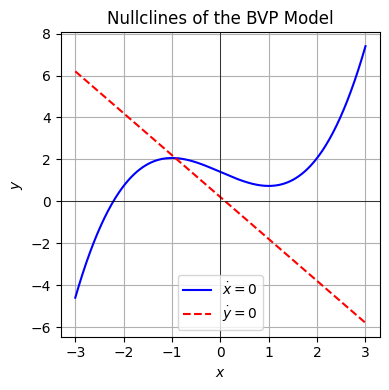

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.1
beta = 0.5
epsilon = -1.4

# Define x range
x = np.linspace(-3, 3, 400)

# Nullclines
y_nullcline_x = (1/3)*x**3 - x - epsilon        # From ẋ = 0
y_nullcline_y = (alpha - x) / beta              # From ẏ = 0

# Plotting
plt.figure(figsize=(4, 4))
plt.plot(x, y_nullcline_x, label=r"$\dot{x}=0$", color='blue')
plt.plot(x, y_nullcline_y, label=r"$\dot{y}=0$", color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Nullclines of the BVP Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.optimize import fsolve

# Parameters
alpha = 0.1
beta = 0.5
epsilon = -1.4

# System of equations: f1 = nullcline1 - nullcline2
def equations(p):
    x, y = p
    f1 = y - (1/3)*x**3 + x + epsilon  # x-nullcline
    f2 = y - (alpha - x)/beta          # y-nullcline
    return (f1, f2)

# Initial guess
x0, y0 = 0.0, 0.0
sol = fsolve(equations, (x0, y0))

print(f"Equilibrium point (x*, y*) = ({sol[0]:.4f}, {sol[1]:.4f})")



Equilibrium point (x*, y*) = (-0.9310, 2.0620)
